# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/ (**New package needs to be installed**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [15]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Q4 - Implementing dynamic programming algorithms in the GridWorld domain.

In this question, you are asked to implement the **value iteration** (See the pseudocode on page 83) and **policy iteration** (See the pseudocode on page 80). 

- The implementation of the GridWorld is given in the follow **GridWorld** class. Please use it to compute the dynamics and the reward
- Please implement the value iteration and policy iteration in the following blocks. 

In [16]:
"""DO NOT CHANGE THIS BLOCK"""
# The GridWorld domain in Example 3.5
class GridWorld(object):
    def __init__(self):
        # define the state space
        self.state_space = [
            [0, 0], [0, 1], [0, 2], [0, 3], [0, 4],
            [1, 0], [1, 1], [1, 2], [1, 3], [1, 4],
            [2, 0], [2, 1], [2, 2], [2, 3], [2, 4],
            [3, 0], [3, 1], [3, 2], [3, 3], [3, 4],
            [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]
        ]

        # define special states
        self.A, self.B = np.array([0, 1]), np.array([0, 3])
        self.A_prime, self.B_prime = np.array([4, 1]), np.array([2, 3])

        # define the action space
        self.action_space = {
            "north": [-1, 0],
            "south": [1, 0],
            "west": [0, -1],
            "east": [0, 1]
        }

    def reset(self):
        pass

    def step(self, s, a) -> (list, float):
        """
        Args:
            s (list): a list contains the position of the current state
            a (str): name of the action
        """
        # convert the state to numpy array
        s_arr = np.array(s)
        # convert the action to numpy array
        a_arr = np.array(self.action_space[a])

        # compute the next state and reward using the dynamics function
        next_s, r = self.dynamics_func(s_arr, a_arr)

        # return the next state and the reward
        return next_s, r

    def dynamics_func(self, s_arr, a_arr) -> (list, float):
        """
        Args:
            s_arr (numpy.array): numpy array contains the position of the current state
            a_arr (numpy.array): numpy array contains the change of the current state
        """
        # check for special states A and B
        # From state A, all four actions yield a reward of +10 and take the agent to A_prime
        if np.array_equal(s_arr, self.A):
            return self.A_prime.tolist(), 10.0

        # From state B, all actions yield a reward of +5 and take the agent to B prime.
        if np.array_equal(s_arr, self.B):
            return self.B_prime.tolist(), 5.0

        # check for normal states
        # compute the next state position and reward
        next_s = s_arr + a_arr
        if next_s.tolist() not in self.state_space:
            # Actions that would take the agent off the grid leave its location unchanged, but also result in a reward
            # of -1
            return s_arr.tolist(), -1.0
        else:
            # Other actions result in a reward of 0
            return next_s.tolist(), 0.0

In [17]:
"""DO NOT CHANGE THIS BLOCK"""
# Function to print the optimal state value
def print_optimal_state_value(s_v):
    """
    Args:
        s_v (numpy.array): a 2-D numpy array contains the optimal state values with size 5 x 5
    """
    print("=============================")
    print("==  Optimal State Value    ==")
    print("=============================")  
    print(s_v.round(decimals=1))
    print("=============================")

# Function to print the optimal policy 
def print_optimal_policy(s_v, env, ga):
    """
    Args:
        s_v (numpy.array): a 2-D numpy array contains the optimal state value with size 5 x 5
        env (env): the grid-world environment
        ga (float): gamma 
    """
    print("=============================")
    print("==     Optimal Policy      ==")
    print("=============================")
    action_names = list(env.action_space.keys())
    for i in range(5):
        for j in range(5):
            q_v = []
            for a in env.action_space.keys():
                next_s, r = env.step([i, j], a)
                q_v.append(r + ga * s_v[next_s[0], next_s[1]])
            q_v = np.array(q_v)

            actions = np.where(q_v == q_v.max())[0]
            actions = [action_names[a] for a in actions]

            print(f"{[i, j]} = {actions}")
        print("------------------------------")

## Q4 - (a): Implement value iteration. Please complete the implementation of the value iteration below.

In [18]:
def run_value_iteration(env, threshold, gamma):
    """
    Args: 
        env: the grid-world environment, we use it to compute:
            - the next state: s'
            - the transition probability: p(s'|s,a)
            - the reward : r
        threshold: threshold determining the estimation threshold
        gamma: the discounted factor
        
        Note: we use the vanilla implementation, where we maintain two separate numpy arrays to store the
              state value and the updated state value. 
    """
    # initialize the state value to be 0
    state_value = np.zeros((5, 5))
    
    # iteration counter
    iter_counter = 0

                                            #########################
                                            ##### MY WORK START #####
                                            #########################

    # Loop
    while True:
        # Assuming the value iteration should be terminated for the current iteration
            # unless there exists one state whose value estimation error > threshold
        is_terminal = True

        # Save new state value
        new_state_value = np.zeros_like(state_value)

        # Loop all states 
        for i in range(5):
            for j in range(5):
                # Bbtain the current state value estimation
                old_value = state_value[i,j]
                
                # compute the updated state value V(s) using equation 4.10.                
                # Create an empty list, V_a, to append V(s) for all actions "a", then find the max
                V_a = []
                for action, action_dir in env.action_space.items():
                    next_s, r = env.step([i, j], action)
                    V_a.append(r + gamma*(state_value[next_s[0], next_s[1]]))
                new_value = max(V_a)
                    
                # check the termination
                if abs(new_value - old_value) > threshold:
                    is_terminal = False
                
                # store the updated value in the new_state_value
                new_state_value[i, j] = new_value

        # update the current state value with the updated values
        state_value = new_state_value.copy()
        
        # terminate the loop 
        if is_terminal:
            break

    return state_value

                                            #######################
                                            ##### MY WORK END #####
                                            #######################


In [19]:
"""DO NOT CHANGE: it is used to run the value iteration above"""
# run value iteration (DO NOT CHANGE)
# create the envrionment
my_grid = GridWorld()
my_grid.reset()

# threshold determining the accuracy of the estimation
threshold = 1e-3

# discounted factor
gamma = 0.9

# run the value iteration
state_value = run_value_iteration(my_grid, threshold, gamma)

# print the optimal state value
print_optimal_state_value(state_value)

# print the optimal policy
print_optimal_policy(state_value, my_grid, gamma)

==  Optimal State Value    ==
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
==     Optimal Policy      ==
[0, 0] = ['east']
[0, 1] = ['north', 'south', 'west', 'east']
[0, 2] = ['west']
[0, 3] = ['north', 'south', 'west', 'east']
[0, 4] = ['west']
------------------------------
[1, 0] = ['north', 'east']
[1, 1] = ['north']
[1, 2] = ['north', 'west']
[1, 3] = ['west']
[1, 4] = ['west']
------------------------------
[2, 0] = ['north', 'east']
[2, 1] = ['north']
[2, 2] = ['north', 'west']
[2, 3] = ['north', 'west']
[2, 4] = ['north', 'west']
------------------------------
[3, 0] = ['north', 'east']
[3, 1] = ['north']
[3, 2] = ['north', 'west']
[3, 3] = ['north', 'west']
[3, 4] = ['north', 'west']
------------------------------
[4, 0] = ['north', 'east']
[4, 1] = ['north']
[4, 2] = ['north', 'west']
[4, 3] = ['north', 'west']
[4, 4] = ['north', 'west']
------------------------------


## Q4 - (b): Implement policy iteration

In [20]:
# Policy evaluation
def policy_evaluation(env, policy, threshold, gamma):
    """
    Args:
        env: the grid-world environment, we use it to compute:
            - the next state: s'
            - the transition probability: p(s'|s,a)
            - the reward : r
        policy (numpy.array): a 2-D numpy array stores the action to take at each location.
        threshold (float): threshold determining the estimation threshold
        gamma (float): the discounted factor
        
        Note: we use the vanilla implementation, where we maintain two separate numpy arrays to store the
              state value and the updated state value. 
    """
                                            #########################
                                            ##### MY WORK START #####
                                            #########################
    # initialize the state values
    state_value = np.zeros((5, 5))

    # start evaluate the current policy
    while True:
        # set terminal flag similar to the value iteration flag.
        is_terminal = True

        # new state value
        new_state_value = np.zeros_like(state_value)

        # Loop all states
        for i in range(5):
            for j in range(5):
                # store the old state value
                old_v = state_value[i, j]
                
                # update the state value using the equation 4.5                
                # List of possible actions
                actions = ["north", "south", "west", "east"]
                
                # Find the s' and r based on the current state and action given by the policy
                next_s, r = env.step([i, j], actions[policy[i, j]])
                
                # Compute V(s), now knowing r and s'
                new_v = r + gamma*state_value[next_s[0], next_s[1]]

                # check termination
                if abs(new_v - old_v) > threshold:
                    is_terminal = False
                    
                # store the updated state value for state [i, j]
                new_state_value[i, j] = new_v

        # update state value
        state_value = new_state_value.copy()

        # check termination
        if is_terminal:
            break

    return state_value

# Policy improvement
def policy_improvement(env, policy, state_value, gamma):
    # set the policy improvement flag
    policy_stable = True
    
    # loop all states
    for i in range(5):
        for j in range(5):
            # store the old action
            old_a = policy[i, j]

            # compute a new greedy action based on the latest state value
            pi_a = np.empty((0,0))
            for action, action_dir in env.action_space.items():
                next_s, r = env.step([i, j], action)
                pi_a = np.append(pi_a, r + gamma*state_value[next_s[0], next_s[1]])
            new_a = np.argmax(pi_a)
            
            # check if the policy is stable
            if old_a != new_a:
                policy_stable = False
            
            # update the policy with the new greedy policy
            policy[i, j] = new_a

    return policy.astype(int), policy_stable

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

In [21]:
"""DO NOT CHANGE: it is used to run the policy iteration above"""
# run policy iteration (DO NOT CHANGE)
my_grid = GridWorld()
my_grid.reset()

# threshold and gamma
threshold, gamma = 1e-3, 0.9

# initialize a policy
policy = np.random.randint(low=0, high=4, size=(5, 5))

# run policy iteration
while True:
    # policy evaluation
    state_value = policy_evaluation(my_grid, policy, threshold, gamma)

    # policy improvement
    policy, policy_stable = policy_improvement(my_grid, policy, state_value, gamma)

    # check if policy is stable
    if policy_stable:
        break

# print the optimal state value
print_optimal_state_value(state_value)

# print the optimal policy
print_optimal_policy(state_value, my_grid, gamma)

==  Optimal State Value    ==
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
==     Optimal Policy      ==
[0, 0] = ['east']
[0, 1] = ['north', 'south', 'west', 'east']
[0, 2] = ['west']
[0, 3] = ['north', 'south', 'west', 'east']
[0, 4] = ['west']
------------------------------
[1, 0] = ['north', 'east']
[1, 1] = ['north']
[1, 2] = ['north', 'west']
[1, 3] = ['west']
[1, 4] = ['west']
------------------------------
[2, 0] = ['north', 'east']
[2, 1] = ['north']
[2, 2] = ['north', 'west']
[2, 3] = ['north', 'west']
[2, 4] = ['north', 'west']
------------------------------
[3, 0] = ['north', 'east']
[3, 1] = ['north']
[3, 2] = ['north', 'west']
[3, 3] = ['north', 'west']
[3, 4] = ['north', 'west']
------------------------------
[4, 0] = ['north', 'east']
[4, 1] = ['north']
[4, 2] = ['north', 'west']
[4, 3] = ['north', 'west']
[4, 4] = ['north', 'west']
------------------------------


# Q5 - Jack's Car Rental Problem

This is a challenging problem. We provide the implementation of the original problem. You can directly use it
to solve the question (a); However, to solve question (b), the only thing you need to do is to modify the following method function in the class based on the descriptions in (b). 


    **compute_reward_modified()**

We highly recommend you to read the implementation in more details because you will need it to complete the policy iteration below. 

In [22]:
# Implementation the Jack's Car Rental problem in Example 4.2 (DO NOT CHANGE)
class JackCarRental(object):
    def __init__(self, max_car_num=20):
        # Define the state space (the state is the number of cars at each location at the end of the day)
        self.max_num = max_car_num
        # Define the table for the state value
        self.state_value = np.zeros((self.max_num + 1, self.max_num + 1))

        # Define the action space (the number of the cars that Jack plans to move from lot1 to lot2)
        # For example, if a >= 0, moving |a| cars from lot1 to lot2; Otherwise, moving |a| cars
        # from lot2 to lot1.
        self.action_space = np.linspace(start=-5, stop=5, num=11, dtype=int)

        # Define a truncated version of the Poisson distribution
        # Note that, Poisson distribution is a discrete distribution for infinite possible values.
        # In this problem, we only want to consider the values with probability bigger than a threshold.
        # We ignore other values because their probabilities of happening are too small to be considered.
        self.truncated_threshold = 1e-6
        self.request_distribution_lot1 = TruncatedPoissonDistribution(3, self.truncated_threshold)
        self.return_distribution_lot1 = TruncatedPoissonDistribution(3, self.truncated_threshold)
        self.request_distribution_lot2 = TruncatedPoissonDistribution(4, self.truncated_threshold)
        self.return_distribution_lot2 = TruncatedPoissonDistribution(2, self.truncated_threshold)

        # Pre-compute the transition function p(s'|s, a) and r(s, a) and store them as numpy arrays
        self.p_lot1, self.r_lot1 = self.open_to_close(self.request_distribution_lot1, self.return_distribution_lot1)
        self.p_lot2, self.r_lot2 = self.open_to_close(self.request_distribution_lot2, self.return_distribution_lot2)

    def reset(self):
        pass

    def step(self, s, a):
        """ Step function: it returns the next state given the current state and the action
        Args:
            s (list of two integers): a list variable contains two integers that represent the number of the cars
                                      at lot1 and lot2 by the end of the day, respectively.
            a (int): an integer variable represents the number of cars that Jack wants to move from lot1 to lot2.
                     Note, if a >= 0, Jack moves |a| cars from lot1 to lot2; Otherwise, he moves the cars conversely.
        Returns:
            next_s (list of two integers): a list variable contains two integers that represent the number of the cars
                                           at lot1 and lot2 by the end of the day, respectively.
            reward (float): a float variable represents the rewards by taking action a at state s. Note that: it
                            aggregates the cost of moving cars and gain of renting out cars.
            prob (float) between (0, 1): a float variable represents the probability of transit to next_s from s by
                                         taking a. In other words, prob = p(next_s|s, a)
        """
        """Business ends"""
        # Note the state is the number of cars at the two lots by the end of the day
        car_num_lot1, car_num_lot2 = s

        """Car moving overnight"""
        # We define the action as moving cars from lot1 to lot2:
        # if a >= 0: moving cars from lot1 to lot2; Otherwise moving car from lot2 to lot1
        # update the cars in both slots (overnight)
        move_car_num = self.move_car(s, a)
        car_num_lot1_after_move = car_num_lot1 - move_car_num
        car_num_lot2_after_move = car_num_lot2 + move_car_num

        """Business starts"""
        # compute the requests for lot1 and lot2
        request_car_lot1_num = self.request_distribution_lot1.sample()
        request_car_lot2_num = self.request_distribution_lot2.sample()

        # compute the return for lot1 and lot2
        return_car_lot1_num = self.return_distribution_lot1.sample()
        return_car_lot2_num = self.return_distribution_lot2.sample()

        """Business ends"""
        # compute the number of cars at each lot
        car_num_lot1_new = self.update_car_num(car_num_lot1_after_move, request_car_lot1_num, return_car_lot1_num)
        car_num_lot2_new = self.update_car_num(car_num_lot2_after_move, request_car_lot2_num, return_car_lot2_num)

        # compute the p(s'|s, a)
        prob = self.p_lot1[car_num_lot1_after_move][car_num_lot1_new] * \
            self.p_lot2[car_num_lot2_after_move][car_num_lot2_new]

        # compute the reward
        reward = self.compute_reward(move_car_num, car_num_lot1_after_move, car_num_lot2_after_move)

        # compute the next state
        next_s = [car_num_lot1_new, car_num_lot2_new]

        # the return is the next_state, reward (cost + expected incomes from lot1 and lot2), p(s'|s, a)
        return next_s, reward, prob

    def compute_reward(self, moved_cars, car_num_lot1, car_num_lot2):
        """ Compute the total reward between two consecutive days, it contains the following stages:
                - When business ends, Jack moves |moved_cars| from lot1 to lot2. The reward is negative and equals to
                  -2 * abs(moved_cars). Note, moved_cars is the actual movable cars.
                - After car moving, when business starts the next day, requests come independently in lot1 and lot2.
                  Therefore, the reward is positive. We aggregate the reward from lot1 and lot2 given the number of cars
                  at lot1 and lot2 after car moving.
            Args:
                moved_cars (int): number of cars that are actually moved from lot1 to lot2 by Jack.
                                  Note: if moved_cars >=0, Jack moves car from lot1 to lot2; Otherwise, he moves
                                  from lot2 to lot1.
                car_num_lot1 (int): number of cars at lot1 after the car moving
                car_num_lot2 (int): number of cars at lot2 after the car moving
        """
        # compute the cost + expected reward at lot1 + expected reward at lot2
        return -2 * abs(moved_cars) + self.r_lot1[car_num_lot1] + self.r_lot2[car_num_lot2]

                                            #########################
                                            ##### MY WORK START #####
                                            #########################
    
    def compute_reward_modified(self, moved_cars, car_num_lot1, car_num_lot2):
        """ Besides the cost of moving cars between lot1 and lot2, the reward function is adjusted based on the
            following modifications:
                - One car can be moved from lot1 to lot2 for free.
                - If num_car_after_move > 10, additional $4 are charged at each time lot regardless of how many cars
                - $2 per car moving fee
                - $10 per car renting income
        """
        """ Modified the reward function based on the description in (b)"""
        
        # Baseline reward. The reward will always start with the expected reward of both the lots, no matter
        #    the other conditions
        reward = self.r_lot1[car_num_lot1] + self.r_lot2[car_num_lot2]
        
        if moved_cars > 0:
            # at least 1 car went from lot 1 to lot 2, so we subtract 1 from moved_cars for the cost calculation
            #    since 1 is free in that direction.
            reward += -2*(moved_cars-1)
        else:
            # Either no cars were moved, or they went from lot 2 to lot 1. We do not get to move any for free in
            #    that direction, so a reward of 2 is subtracted for every car moved.
            reward += -2*abs(moved_cars)
        
        # if either car lot has more than 10 cars, subtract a cost of 4.
        if car_num_lot1 > 10:
            reward += -4
        elif car_num_lot2 > 10:
            reward += -4

        return reward

                                            #######################
                                            ##### MY WORK END #####
                                            #######################

    def open_to_close(self, request_distribution, return_distribution):
        """ Considering one lot (lot1 or lot2), the possible number of cars when business opens is [0, 25]
            25 = 20 (maximal number when business closes) + (5 cars moved by Jack).
            When business ends, the possible number of cars is [0, 20].

            We consider another form of transition probability p(s'|s, a) and reward function r(s, a).

            Since the dynamics for the overnight car moving is deterministic (i.e., by default, Jack moves certain
            amount of cars between lot1 and lot2 once), the stochasticity comes from the request/return from the
            customers. Therefore, we can re-write the transition function as:
                p(lot_end|lot_end_yesterday, a) = p(lot_end|lot_open) * p(lot_open|lot_end_yesterday,a) = p(lot_end|lot_open),
                where y is the number of cars at one lot after Jack moves the cars p(lot_open|lot_end_yesterday,a) = 1.

            The stochasticity mainly comes from the second stage we call it which is modeled in this open_to_close function.
        Args:
            request_distribution (TruncatedPoissonDistribution): a truncated Possion distribution under a threshold for requesting
            return_distribution (TruncatedPoissonDistribution): a truncated Possion distribution under a threshold for returning

        Returns:
            p_arr (np.array): it stores p(car_num_end|car_num_after_move) for all possible combinations. The shape is
                              26 x 21.
            r_arr (np.array): it stores the expected reward for each car_num_after_move in [0, 25]. It also equals to
                              r(s, a) since the moving action is deterministic.
        """
        # Numpy array to store the factorized transition function
        # state_open take integer values from [0, 25]
        # state_end take integer values from [0, 20]
        # p(s_end|s_end_yesterday, a) = p(s_end|s_open) since the moving action is deterministic.
        p_arr = np.zeros((26, 21))
        # Numpy array to store the reward r(s, a) = r(s_open) because the moving the deterministic
        r_arr = np.zeros(26)

        for request_num, request_prob in request_distribution:
            # the positive rewards only come from the request
            # and the initial number of cars will matter
            # since the reward contains stochasticity, we compute the expectation
            # of the reward for each possible state at one parking lot
            for n in range(26):
                r_arr[n] += request_prob * 10 * min(n, request_num)

            # compute the transition function
            for return_num, return_prob in return_distribution:
                for n in range(26):
                    # compute the new n by the end of the day
                    new_n = self.update_car_num(n, request_num, return_num)
                    # update the probability incrementally
                    p_arr[n][new_n] += request_prob * return_prob

        return p_arr, r_arr

    @staticmethod
    def update_car_num(cars_num, request_cars_num, return_cars_num):
        """ Update the number of cars in lot1/lot2 after requesting and returning
        Args:
            cars_num (int): Number of the cars at lot1/lot2 when the business starts
            request_cars_num (int): Number of the cars requested by the customers
            return_cars_num (int): Number of the cars returned by the customers
        """
        return min(max(cars_num - request_cars_num, 0) + return_cars_num, 20)

    @staticmethod
    def move_car(state, action):
        """ Compute the actual number of cars to be moved from lot1 to lot2
        Args:
            state (list): a list variable contains the number of cars (int) at lot1 and lot2.
            action (int): an integer between [-5, 5]
        """
        # Note: action is the number of cars Jack wants to move from lot1 to lot2. But the actual number should follow
        # the condition [-1 * car_num_lot2, car_num_lot1]
        return int(np.clip(action, a_min=-state[1], a_max=state[0]))
    
    
# Implement the truncated Poisson distribution
class TruncatedPoissonDistribution(object):
    def __init__(self, mean, threshold):
        # Check the validation of the mean and threshold
        assert isinstance(mean, int), mean > 0
        assert 0 < threshold < 1.0

        # Store the mean of the Poisson distribution
        self.mean = mean
        # Store the threshold of p(k). Only k with p(k) > threshold would be considered
        self.truncated_threshold = threshold

        # create a list to store the selected discrete values and their probabilities
        self.truncated_values, self.truncated_prob = self.truncate_poisson()

    def truncate_poisson(self):
        """ Create the truncated Poisson distribution with a finite set of ks and a normalized probabilities.
        """
        # Create original Poisson distribution
        distribution = poisson(self.mean)

        # Find the maximal k to be considered
        max_k = 0
        while distribution.pmf(max_k) > self.truncated_threshold:
            max_k += 1

        # Create the truncated value list
        value_list = list(np.linspace(start=0, stop=max_k, num=max_k+1, dtype=int))

        # Create the probability
        prob_list = [distribution.pmf(k) for k in value_list]

        # Normalize the probability for the truncated values
        prob_list = (prob_list / np.sum(prob_list)).tolist()

        return value_list, prob_list

    def sample(self):
        """ Sample a k using the new truncated values and probabilities.
        """
        return np.random.choice(a=self.truncated_values, p=self.truncated_prob)

    def __iter__(self):
        """ Iterate all ks and its corresponding probabilities
        """
        return zip(self.truncated_values, self.truncated_prob)

In [23]:
"""DO NOT CHANGE: it is used to visualize the policy"""
def plot_policy(policy, title):
    policy = np.flip(policy, axis=0)

    car_num_lot1 = list(np.linspace(start=20, stop=0, num=21, dtype=int))
    car_num_lot2 = list(np.linspace(start=0, stop=20, num=21, dtype=int))

    fig, ax = plt.subplots()
    im = ax.imshow(policy, cmap="RdGy")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(car_num_lot2)), labels=car_num_lot2)
    ax.set_yticks(np.arange(len(car_num_lot1)), labels=car_num_lot1)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(car_num_lot1)):
        for j in range(len(car_num_lot2)):
            text = ax.text(j, i, policy[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

## Q5 - (a): Implement the policy iteration algorithm and generate the Figure 4.2

In [24]:
def compute_expected_return(state, action, env, gamma, state_value):
    """ Function is used to compute the expected return given s and a. 
        It returns the value = sum_s' p(s'|s, a)[r(s, a) + gamma * V(s')]
    Args:
        state (list): state (i.e, s)
        action (int): action (i.e, a)
        env: the jack's car rental environment
        gamma (float): discount factor
        state_value (numpy.array): current state value
    """

                                            #########################
                                            ##### MY WORK START #####
                                            #########################
    
    # compute the number of car to move
    car_num_to_move = env.move_car(state, action)

    # compute the state after moving
    state_after_move = [state[0] - car_num_to_move, state[1] + car_num_to_move]
    # compute the expectation using the model of the env
    # new_v(s) <--- \sum_{s'} p(s'|s, a)[r(s, a) + \gamma * old_v(s')]
    new_v = 0
    # The space of |s'| = 21 x 21. Because each lot will have the number of cars within [0, 20].
    for n_1 in range(21):
        for n_2 in range(21):
            # compute the transition probability p(s' | s, a) for one possible s'
            # p(s'|s, a) = p([n1, n2] | s, a) = p([n1, n2] | s_after_move) * p(s_after_move|s, a)
            #            = p([n1, n2] | s_after_move) since p(s_after_move|s,a) = 1 given a is deterministic.
            #            = p(n1 | s_after_move) * p(n2 | s_after_move) since lot1 and lot2 evolves independently.
            #            = p(n1 | s_after_move_lot1) * p(n2 | s_after_move_lot2)
            # prob = p(s'|s, a)
            prob = env.p_lot1[state_after_move[0]][n_1] * env.p_lot2[state_after_move[1]][n_2]

            # compute the reward = cost + expected rewards for lot1 and lot2 given the state after moving the car.
            # reward = r(s, a)
            reward = env.compute_reward(moved_cars=car_num_to_move,
                                        car_num_lot1=state_after_move[0],
                                        car_num_lot2=state_after_move[1])
            
            # V(s) = sum of all s' p(s'|s, a)*(r(s, a) + gamma*state_value(s'))
            new_v += prob*(reward + gamma*state_value[n_1, n_2])

    return new_v
                                            #######################
                                            ##### MY WORK END #####
                                            #######################

In [25]:
                                            #########################
                                            ##### MY WORK START #####
                                            #########################

# Policy evaluation
def policy_evaluation(state_value, policy, env, threshold, gamma):
    # iteration counter
    iter_counter = 0

    # check termination
    while True:
        # iteration counter
        iter_counter += 1

        # assume the current iteration should be terminated
        is_terminal = True

        # create a numpy array to store the new state value
        new_state_value = np.zeros_like(state_value)

        # loop all valid states
        for i in range(21):
            for j in range(21):
                # state (e.g. [i, j])
                state = [i, j]
                
                # store the old V value
                old_v = state_value[i, j]
                
                # get the action from the policy
                action = policy[i, j]
                
                # compute the expected return
                new_v = compute_expected_return(state, action, env, gamma, state_value)
                
                # compute the error for this state
                if abs(old_v-new_v) > threshold:
                    is_terminal = False
                
                # store the updated state value
                new_state_value[i, j] = new_v

        # update the state value table
        state_value = new_state_value.copy()

        # check the termination
        if is_terminal:
            break

    return state_value


In [26]:
# Implement the policy improvement
def policy_improvement(state_value, policy, env, gamma):
    # assume the policy is already stable
    is_stable = True
    # loop the state space
    for i in range(21):
        for j in range(21):
            # state
            state = [i, j]
            
            # obtain the old action
            old_a = policy[i, j]
            
            # compute a new greedy action
            # Create an empty np array to store V(s) for all actions [-5,5], then find argmax
            V_a = np.empty((0,0))
            for action in np.arange(11)-5:
                V_a = np.append(V_a, compute_expected_return(state, action, env, gamma, state_value))
            new_a, = np.where(V_a == V_a[np.argmax(V_a)])
            # If there is a tie, the action should be 0. Otherwise, it will be the max location found in argmax.
            new_a = 0 if len(new_a) > 1 else np.min(new_a)-5

            # check if the policy is stable at state [i, j]
            if old_a != new_a:
                is_stable = False
            
            # update the policy
            policy[i, j] = new_a

    return policy, is_stable
                                            #######################
                                            ##### MY WORK END #####
                                            #######################

In [27]:
"""DO NOT CHANGE THIS BLOCK: it is the policy iteration"""
def run_policy_iteration(env, threshold, gamma):
    # initialize the policy
    policy = np.zeros((21, 21), dtype=int)

    # initialize the state value
    state_value = np.zeros((21, 21))

    # run policy iteration
    policy_iter_counter = 0
    
    # save the policies in the iteration
    results_list = []

    # start policy iteration
    while True:
        # print info
        print(f"======================================")
        print(f"==   Policy iteration = {policy_iter_counter}")
        print(f"======================================")
        
        # policy evaluation
        print(f"Iter {policy_iter_counter}: Policy evaluation starts.")
        state_value = policy_evaluation(state_value, policy, env, threshold, gamma)
        print(f"Iter {policy_iter_counter}: Policy evaluation ends.")

        # policy improvement
        print(f"Iter {policy_iter_counter}: Policy improvement starts.")
        policy, is_stable = policy_improvement(state_value, policy, env, gamma)
        print(f"Iter {policy_iter_counter}: Policy improvement ends.")
        
        # save to the list
        results_list.append({"state_value": state_value.copy(),
                             "policy": policy.copy(),
                             "title": f"Iteration = {policy_iter_counter}"})

        if is_stable:
            break
        else:
            policy_iter_counter += 1
                
    print("======================")
    print("Policy iteration ends.")
            
    return results_list

In [28]:
"""DO NOT CHANGE THIS BLOCK: it is used to run the policy iteration in the Jack's Car Rental Problem"""
"""IT WILL TOOK SOME TIME. PLEASE BE PATIENT."""
# run the policy iteration
env = JackCarRental()
env.reset()

# set the threshold for policy evaluation
threshold = 1e-3

# set the gamma
gamma = 0.9

# run the policy iteration
results_list = run_policy_iteration(env, threshold, gamma)

==   Policy iteration = 0
Iter 0: Policy evaluation starts.
Iter 0: Policy evaluation ends.
Iter 0: Policy improvement starts.
Iter 0: Policy improvement ends.
==   Policy iteration = 1
Iter 1: Policy evaluation starts.
Iter 1: Policy evaluation ends.
Iter 1: Policy improvement starts.
Iter 1: Policy improvement ends.
==   Policy iteration = 2
Iter 2: Policy evaluation starts.
Iter 2: Policy evaluation ends.
Iter 2: Policy improvement starts.
Iter 2: Policy improvement ends.
==   Policy iteration = 3
Iter 3: Policy evaluation starts.
Iter 3: Policy evaluation ends.
Iter 3: Policy improvement starts.
Iter 3: Policy improvement ends.
==   Policy iteration = 4
Iter 4: Policy evaluation starts.
Iter 4: Policy evaluation ends.
Iter 4: Policy improvement starts.
Iter 4: Policy improvement ends.
Policy iteration ends.


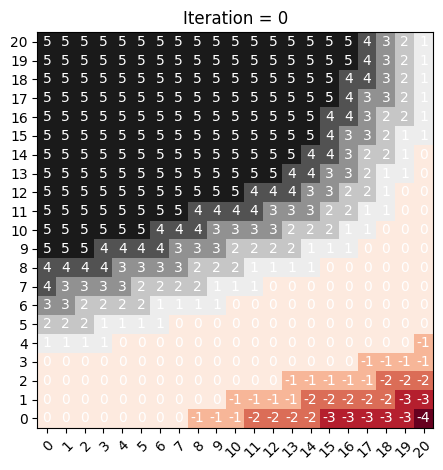

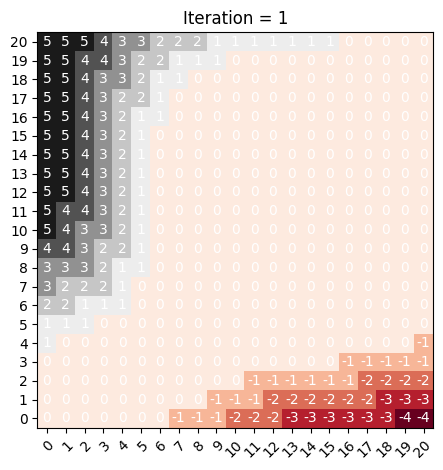

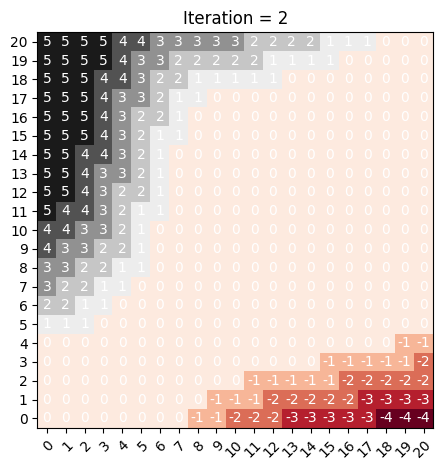

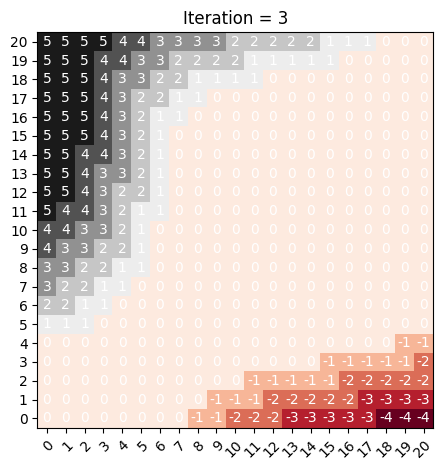

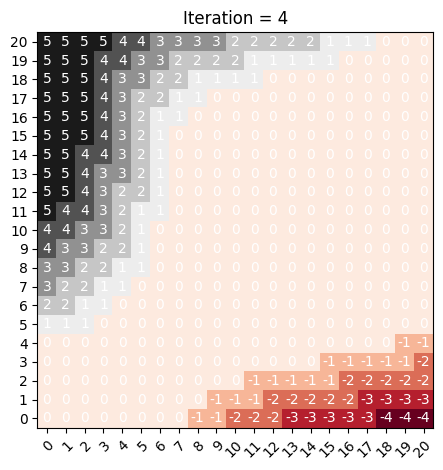

In [29]:
"""DO NOT CHANGE THIS BLOCK: it is used to visualize the policy for each iteration"""
# plot the final policy
for res in results_list:
    policy = res['policy']
    title = res['title']
    plot_policy(policy, title)

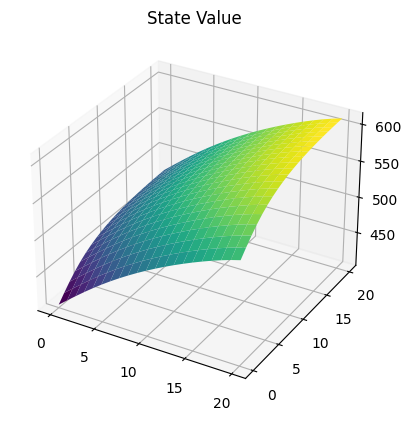

In [30]:
"""DO NOT CHANGE THIS BLOCK: it is used to visualize the value function"""
#Plot the value function
def plot_optimal_values(state_value):
    x = np.linspace(0, 20, 21)
    y = np.linspace(0, 20, 21)

    X, Y = np.meshgrid(x, y)
    Z = state_value
    
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('State Value')
    
state_value = results_list[0]['state_value']
plot_optimal_values(state_value)

## Q5 - (b): Apply the implemented policy iteration on the modified Jack's car rental problem

In [31]:
def compute_expected_return(state, action, env, gamma, state_value):
    """ Function is used to compute the expected return given s and a. 
        It returns the value = sum_s' p(s'|s, a)[r(s, a) + gamma * V(s')]
    Args:
        state (list): state (i.e, s = [i, j])
        action (int): action (i.e, a = 5)
        env: the jack's car rental environment
        gamma (float): discount factor
        state_value (numpy.array): current state value
    """
    
                                            #########################
                                            ##### MY WORK START #####
                                            #########################
    
    # compute the number of car to move
    car_num_to_move = env.move_car(state, action)

    # compute the state after moving
    state_after_move = [state[0] - car_num_to_move, state[1] + car_num_to_move]

    # compute the expectation using the model of the env
    # new_v(s) <--- \sum_{s'} p(s'|s, a)[r(s, a) + \gamma * old_v(s')]
    new_v = 0
    # The space of |s'| = 21 x 21. Because each lot will have the number of cars within [0, 20].
    for n_1 in range(21):
        for n_2 in range(21):
            # compute the transition probability p(s' | s, a) for one possible s'
            # p(s'|s, a) = p([n1, n2] | s, a) = p([n1, n2] | s_after_move) * p(s_after_move|s, a)
            #            = p([n1, n2] | s_after_move) since p(s_after_move|s,a) = 1 given a is deterministic.
            #            = p(n1 | s_after_move) * p(n2 | s_after_move) since lot1 and lot2 evolves independently.
            #            = p(n1 | s_after_move_lot1) * p(n2 | s_after_move_lot2)
            # prob = p(s'|s, a)
            prob = env.p_lot1[state_after_move[0]][n_1] * env.p_lot2[state_after_move[1]][n_2]

            # compute the reward = cost + expected rewards for lot1 and lot2 given the state after moving the car.
            # reward = r(s, a)
            reward = env.compute_reward_modified(moved_cars=car_num_to_move,
                                                 car_num_lot1=state_after_move[0],
                                                 car_num_lot2=state_after_move[1])
            
            # [COMMENT]: Same equation/explanation as above.
            new_v += prob*(reward + gamma*state_value[n_1, n_2])
            
    return new_v

In [32]:
# Implement the policy evaluation
def policy_evaluation(state_value, policy, env, threshold, gamma):
    # iteration counter
    iter_counter = 0

    # check termination
    while True:
        # iteration counter
        iter_counter += 1

        # assume the current iteration should be terminated
        is_terminal = True

        # create a numpy array to store the new state value
        new_state_value = np.zeros_like(state_value)

        # loop all valid states
        for i in range(21):
            for j in range(21):
                # state (e.g., [i, j])
                state = [i, j]
                
                # store the old V value
                old_v = state_value[i, j]
    
                # get the action from the policy
                action = policy[i, j]
        
                # compute the expected return
                new_v = compute_expected_return(state, action, env, gamma, state_value)
            
                # compute the error for this state
                if abs(old_v - new_v) > threshold:
                    is_terminal = False
                
                # store the updated state value
                new_state_value[i, j] = new_v

        # update the state value table
        state_value = new_state_value.copy()

        # check the termination
        if is_terminal:
            break

    return state_value

In [33]:
# Implement the policy improvement
def policy_improvement(state_value, policy, env, gamma):
    # assume the policy is already stable
    is_stable = True
    # loop the state space
    for i in range(21):
        for j in range(21):
            # state
            state = [i, j]
            
            # obtain the old action
            old_a = policy[i, j]
            
            # compute a new greedy action
            V_a = np.empty((0,0))
            for action in np.arange(11)-5:
                V_a = np.append(V_a, compute_expected_return(state, action, env, gamma, state_value))
            new_a, = np.where(V_a == V_a[np.argmax(V_a)])
            if len(new_a) > 1:
                new_a = 0
            else:
                new_a = np.min(new_a)-5

            # check if the policy is stable at state [i, j]
            if old_a != new_a:
                is_stable = False
                
            # update the policy
            policy[i, j] = new_a

    return policy, is_stable
                                            #######################
                                            ##### MY WORK END #####
                                            #######################

In [34]:
"""DO NOT CHANGE BELOW"""
def run_policy_iteration(env, threshold, gamma):
    # initialize the policy
    policy = np.zeros((21, 21), dtype=int)

    # initialize the state value
    state_value = np.zeros((21, 21))

    # run policy iteration
    policy_iter_counter = 0
    
    # save the policies in the iteration
    results_list = []

    # start policy iteration
    while True:
        # print info
        print(f"======================================")
        print(f"==   Policy iteration = {policy_iter_counter}")
        print(f"======================================")
        
        # policy evaluation
        print(f"Iter {policy_iter_counter}: Policy evaluation starts.")
        state_value = policy_evaluation(state_value, policy, env, threshold, gamma)
        print(f"Iter {policy_iter_counter}: Policy evaluation ends.")

        # policy improvement
        print(f"Iter {policy_iter_counter}: Policy improvement starts.")
        policy, is_stable = policy_improvement(state_value, policy, env, gamma)
        print(f"Iter {policy_iter_counter}: Policy improvement ends.")
        
        # save to the list
        results_list.append({"state_value": state_value.copy(),
                             "policy": policy.copy(),
                             "title": f"Iteration = {policy_iter_counter}"})

        if is_stable:
            break
        else:
            policy_iter_counter += 1
                
    print("======================")
    print("Policy iteration ends.")
            
    return results_list

In [35]:
"""DO NOT CHANGE THIS BLOCK"""
"""IT WILL TOOK SOME TIME. PLEASE BE PATIENT."""
# run the policy iteration
env = JackCarRental()
env.reset()

# set the threshold for policy evaluation
threshold = 1e-3

# set the gamma
gamma = 0.9

# run the policy iteration
results_list = run_policy_iteration(env, threshold, gamma)

==   Policy iteration = 0
Iter 0: Policy evaluation starts.
Iter 0: Policy evaluation ends.
Iter 0: Policy improvement starts.
Iter 0: Policy improvement ends.
==   Policy iteration = 1
Iter 1: Policy evaluation starts.
Iter 1: Policy evaluation ends.
Iter 1: Policy improvement starts.
Iter 1: Policy improvement ends.
==   Policy iteration = 2
Iter 2: Policy evaluation starts.
Iter 2: Policy evaluation ends.
Iter 2: Policy improvement starts.
Iter 2: Policy improvement ends.
==   Policy iteration = 3
Iter 3: Policy evaluation starts.
Iter 3: Policy evaluation ends.
Iter 3: Policy improvement starts.
Iter 3: Policy improvement ends.
==   Policy iteration = 4
Iter 4: Policy evaluation starts.
Iter 4: Policy evaluation ends.
Iter 4: Policy improvement starts.
Iter 4: Policy improvement ends.
Policy iteration ends.


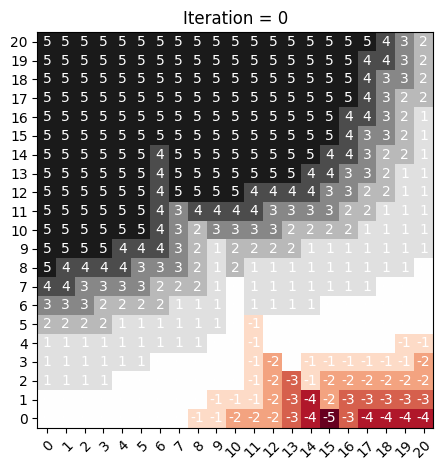

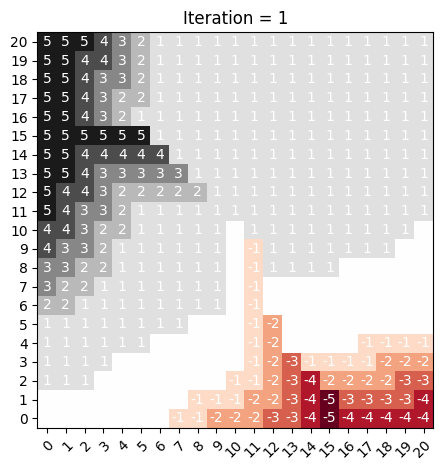

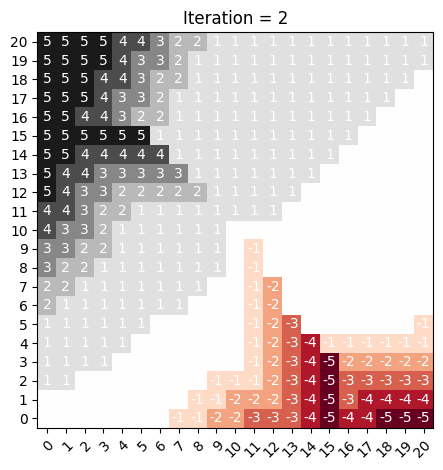

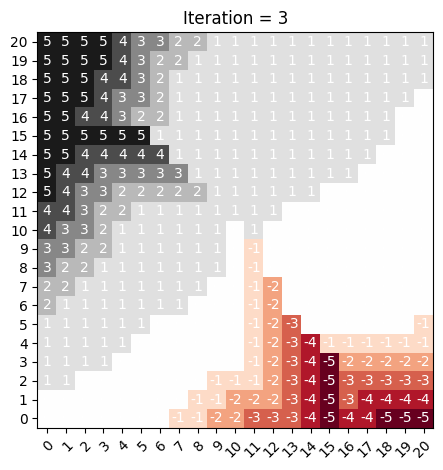

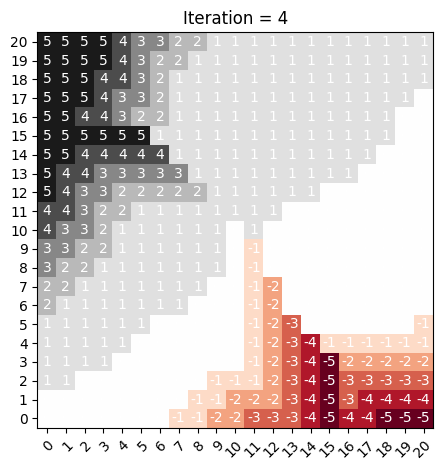

In [36]:
"""DO NOT CHANGE THIS BLOCK"""
# plot the final policy
for res in results_list:
    policy = res['policy']
    title = res['title']
    plot_policy(policy, title)

(21, 21)


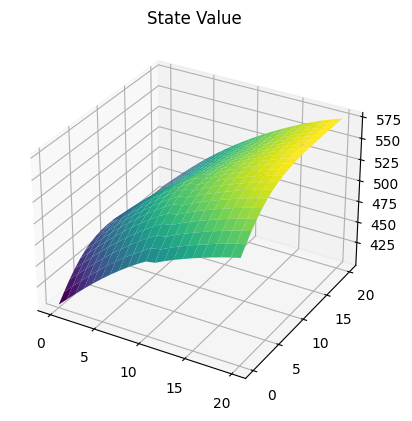

In [37]:
"""DO NOT CHANGE THIS BLOCK"""
# Plot the value function
def plot_optimal_values(state_value):
    x = np.linspace(0, 20, 21)
    y = np.linspace(0, 20, 21)

    X, Y = np.meshgrid(x, y)
    Z = state_value
    
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('State Value')
    
state_value = results_list[0]['state_value']
print(state_value.shape)
plot_optimal_values(state_value)